In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [5]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [6]:
epgExpOutbCDFT = epgExpOutb.loc[exp_1g_corr.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

In [8]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPi0/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPi0/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPi0/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPi0/exp/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [9]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_3987_corr
bkgSimInb = df_4076_1g_corr
pi0SimInb = df_4076_2g_corr

In [10]:
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

Text(0.5, 0, '$Pp$ [GeV/c]')

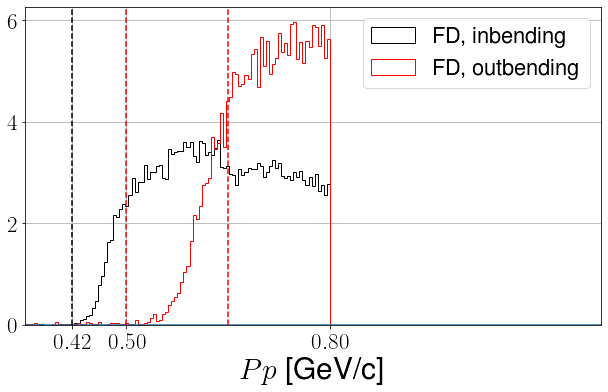

In [27]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbFD.Pp.hist(bins = np.linspace(0.35, 0.8, 101), histtype = 'step', color = 'k', label = 'FD, inbending', density = True)
epgExpOutbFD.Pp.hist(bins = np.linspace(0.35, 0.8, 101), histtype = 'step', color = 'r', label = 'FD, outbending', density = True)
plt.xlim([0.35, 1.2])
plt.axhline(0.001)
plt.legend(loc = 'best')
plt.xticks([0.42, 0.5, 0.8])
plt.axvline(0.42, color = 'k', linestyle = '--')
plt.axvline(0.5, color = 'r', linestyle = '--')
plt.axvline(0.65, color = 'r', linestyle = '--')
# plt.axvline(0.65, color = 'r', linestyle = '--')
plt.xlabel(r"$Pp$"+" ["+GeVc+"]")

Text(0.5, 0, '$Pp$ [GeV/c]')

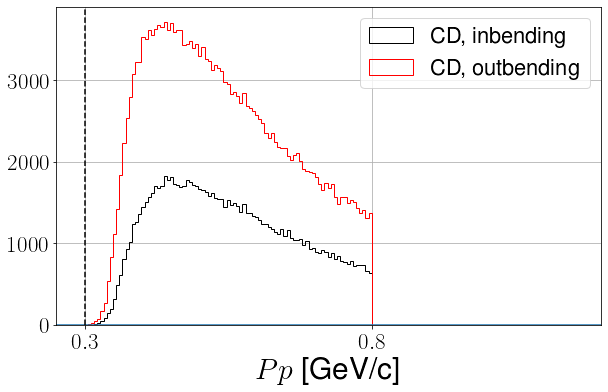

In [17]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCD.Pp.hist(bins = np.linspace(0.25, 0.8, 101), histtype = 'step', color = 'k', label = 'CD, inbending')
epgExpOutbCD.Pp.hist(bins = np.linspace(0.25, 0.8, 101), histtype = 'step', color = 'r', label = 'CD, outbending')
plt.xlim([0.25, 1.2])
plt.axhline(0.001)
plt.legend(loc = 'best')
plt.xticks([0.3, 0.8])
plt.axvline(0.3, color = 'k', linestyle = '--')
# plt.axvline(0.55, color = 'r', linestyle = '--')
# plt.axvline(0.65, color = 'r', linestyle = '--')
plt.xlabel(r"$Pp$"+" ["+GeVc+"]")